# Showcase some solutions for our solvers

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
results = pd.read_json("./03_clean_data.json.zip")
import shapely.wkt

results["polygon"] = results["polygon"].apply(lambda p: shapely.wkt.loads(p))
results["area"] = results["polygon"].apply(lambda p: p.area)

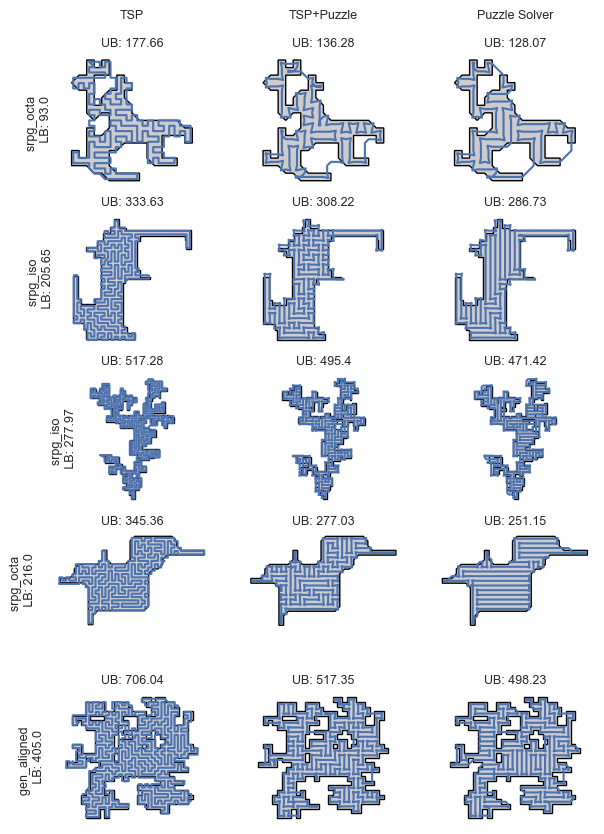

In [6]:
import string
import random as rd
from puzzle_tour_solver.utils.plot_utils import PolygonPatch
sns.set_theme()
sns.set(font_scale=.75)
rd.seed(321)
nrows = 5
ncols = 3 # Number of solvers

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, subplot_kw={'aspect': 1})
axs = axs
fig.set_figheight(10)
fig.set_figwidth(7)

for k, row in enumerate(rd.sample([row for _, row in results.iterrows()], nrows)):

    for i in range(3):
        ax = axs[k, i]
        polygon = row["polygon"]
        ax.add_patch(PolygonPatch(polygon.buffer(0), fc="#cccccc", ec="#000"))

        if i % ncols == 2:
            solution = row["mip_path"]
            solution_ub = row["mip_obj"]
            title_prefix = "Puzzle Solver"
        elif i % ncols == 0:
            solution = row["small_tsp_path"] + [row["small_tsp_path"][0]]
            solution_ub = row["small_tsp_obj"]
            title_prefix = "TSP"
            instance_name = row['instance'].rstrip('.poly').rstrip(string.digits).rstrip("_")
            ax.set_ylabel(f"{instance_name} \n LB: {round(row['area'], 2)}")
            ax.yaxis.set_label_coords(-0.1, 0.5)
        else:
            solution = row["tsp_path"]
            solution_ub = row["tsp_obj"]
            title_prefix = "TSP+Puzzle"

        ax.plot([x for x, _ in solution], [y for _, y in solution])
        ax.set_aspect('equal')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])


        ax.set_facecolor('#ffffff')
        #ax.axis('off')

        title = f"UB: {round(solution_ub, 2)}"
        if k == 0:
            title = title_prefix + '\n\n' + title

        ax.set_title(title)
        ax.set_anchor('N')

#fig.tight_layout()
fig.savefig("out/10_solutions.pdf")